<a href="https://colab.research.google.com/github/11adi/machineLearning/blob/main/Crop_yield_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_data = pd.read_csv("yield_df.csv")
df_data

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,ISO
0,0,Albania,Maize,1990,36613,1485,121.00,16.37,AL
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37,AL
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37,AL
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37,AL
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37,AL
...,...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76,ZWE
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76,ZWE
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76,ZWE
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76,ZWE


In [3]:
df_data_drop = df_data.drop("ISO", axis=1)
df_data_drop = df_data_drop.drop('Unnamed: 0', axis=1)
df_data_drop

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


Cleaning the data

In [4]:
df_data_drop.isna().any()

Area                             False
Item                             False
Year                             False
hg/ha_yield                      False
average_rain_fall_mm_per_year    False
pesticides_tonnes                False
avg_temp                         False
dtype: bool

In [5]:
df_data_drop.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28237    False
28238    False
28239    False
28240    False
28241    False
Length: 28242, dtype: bool

`Transformation of Data `

In [6]:
df_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [7]:
df_data_drop['Year'] = df_data_drop['Year'].astype(float)
df_data_drop['average_rain_fall_mm_per_year'] = df_data_drop['average_rain_fall_mm_per_year'].astype(float)
df_data_drop['hg/ha_yield'] = df_data_drop['hg/ha_yield'].astype(float)

In [8]:
df_data_new = df_data_drop

In [9]:
df_data_new

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990.0,36613.0,1485.0,121.00,16.37
1,Albania,Potatoes,1990.0,66667.0,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990.0,23333.0,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500.0,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000.0,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013.0,22581.0,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013.0,3066.0,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013.0,13142.0,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013.0,22222.0,657.0,2550.07,19.76


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Split the DataFrame into X (features) and y (target variable)
X = df_data_new.drop(['hg/ha_yield'], axis=1)  # Drop the target variable column
y = df_data_new['hg/ha_yield']                 # Assign the target variable to y

# Encode the categorical features using LabelEncoder
encoder = LabelEncoder()
X['Area'] = encoder.fit_transform(X['Area'])
X['Item'] = encoder.fit_transform(X['Item'])
X['Year'] = encoder.fit_transform(X['Year'])
X['average_rain_fall_mm_per_year'] = encoder.fit_transform(X['average_rain_fall_mm_per_year'])
X['pesticides_tonnes'] = encoder.fit_transform(X['pesticides_tonnes'])
X['avg_temp'] = encoder.fit_transform(X['avg_temp'])

# Now X contains the encoded features and y contains the target variable


In [11]:
X

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,0,73,196,793
1,0,3,0,73,196,793
2,0,4,0,73,196,793
3,0,5,0,73,196,793
4,0,6,0,73,196,793
...,...,...,...,...,...,...
28237,100,4,22,39,783,1085
28238,100,5,22,39,783,1085
28239,100,6,22,39,783,1085
28240,100,7,22,39,783,1085


In [12]:
# y = encoder.fit_transform(y)
y

0        36613.0
1        66667.0
2        23333.0
3        12500.0
4         7000.0
          ...   
28237    22581.0
28238     3066.0
28239    13142.0
28240    22222.0
28241    22888.0
Name: hg/ha_yield, Length: 28242, dtype: float64

In [13]:

# Get the encodings as a list
area_encodings = X['Area'].tolist()
item_encodings = X['Item'].tolist()

# Print the first 10 values of the encoded 'Area' column
print(area_encodings[:10])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# area_list = encoder.classes_
# item_list = encoder.classes_

# area_list = np.append(area_list, ['Albania', 'Zimbabwe'])
# item_list = np.append(item_list, ['Maize', 'Sorghum'])

# area_decodings = encoder.inverse_transform(area_encodings)
# item_decodings = encoder.inverse_transform(item_encodings)

# print(area_decodings)
# print(item_decodings)


AttributeError: ignored

In [25]:
encoder = LabelEncoder()
encoder.fit(['Albania', 'Zimbabwe'])
area_list = np.append(encoder.classes_, ['Albania', 'Zimbabwe'])

encoder.fit(['Maize', 'Sorghum'])
item_list = np.append(encoder.classes_, ['Maize', 'Sorghum'])


In [26]:
encoder = LabelEncoder()
area_list = np.append(area_list,['Albania','Algeria','Angola','Argentina','Armenia','Australia','Austria','Azerbaijan', 'Bahamas','Bahrain','Bangladesh','Belarus','Belgium', 'Botswana', 'Brazil','Bulgaria','Burkina Faso','Burundi','Cameroon','Canada','Central African Republic', 'Chile','Colombia','Croatia','Denmark','Dominican Republic','Ecuador','Egypt','El Salvador','Eritrea','Estonia','France','Germany',
                                  'Ghana','Greece','Guatemala','Guinea','Guyana','Haiti','Honduras','Hungary','India','Indonesia','Iraq','Ireland','Italy','Jamaica','Japan','Kazakhstan','Kenya','Latvia','Lebanon','Lesotho','Libya','Lithuania','Madagascar','Malawi','Malaysia','Mali','Mauritania','Mauritius','Mexico','Morocco','Mozambique','Namibia','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Norway',
                                  'Pakistan','Papua New Guinea','Peru','Poland','Portugal','Qatar','Romania','Rwanda','Saudi Arabia','Senegal','Slovenia','South Africa','Spain','Sri Lanka','Suriname','Sweden','Switzerland','Tajikistan','Thailand','Tunisia','Turkey','Uganda','Ukraine','United Kingdom','Uruguay','Zambia','Zimbabwe'])
item_list = np.append(item_list,['Plantains','Maize','Cassava','Potatoes','Rice','Sorghum','Soyabeans','Sweet Potato','Wheat','Yams'])
encoder.fit(area_list)  # Fit the encoder with the extended area_list
area_encoded = encoder.transform(area_list)  # Encode the area_list

encoder.fit(item_list)  # Fit the encoder with the extended item_list
item_encoded = encoder.transform(item_list)  # Encode the item_list

In [27]:
X

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,0,73,196,793
1,0,3,0,73,196,793
2,0,4,0,73,196,793
3,0,5,0,73,196,793
4,0,6,0,73,196,793
...,...,...,...,...,...,...
28237,100,4,22,39,783,1085
28238,100,5,22,39,783,1085
28239,100,6,22,39,783,1085
28240,100,7,22,39,783,1085


In [ ]:
# area_list = encoder.classes_
# item_list = encoder.classes_

# area_list = np.append(area_list, ['Albania','Algeria','Angola','Argentina','Armenia','Australia','Austria','Azerbaijan', 'Bahamas','Bahrain','Bangladesh','Belarus','Belgium', 'Botswana', 'Brazil','Bulgaria','Burkina Faso','Burundi','Cameroon','Canada','Central African Republic', 'Chile','Colombia','Croatia','Denmark','Dominican Republic','Ecuador','Egypt','El Salvador','Eritrea','Estonia','France','Germany',
#                                   'Ghana','Greece','Guatemala','Guinea','Guyana','Haiti','Honduras','Hungary','India','Indonesia','Iraq','Ireland','Italy','Jamaica','Japan','Kazakhstan','Kenya','Latvia','Lebanon','Lesotho','Libya','Lithuania','Madagascar','Malawi','Malaysia','Mali','Mauritania','Mauritius','Mexico','Morocco','Mozambique','Namibia','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Norway',
#                                   'Pakistan','Papua New Guinea','Peru','Poland','Portugal','Qatar','Romania','Rwanda','Saudi Arabia','Senegal','Slovenia','South Africa','Spain','Sri Lanka','Suriname','Sweden','Switzerland','Tajikistan','Thailand','Tunisia','Turkey','Uganda','Ukraine','United Kingdom','Uruguay','Zambia','Zimbabwe'])
# item_list = np.append(item_list, ['Plantains','Maize','Cassava','Potatoes','Rice','Sorghum','Soyabeans','Sweet Potato','Wheat','Yams'])

# area_decodings = encoder.inverse_transform(area_encodings)
# item_decodings = encoder.inverse_transform(item_encodings)

# print(area_decodings)
# print(item_decodings)


In [28]:
df_data_new['Item'].drop_duplicates()

0                      Maize
1                   Potatoes
2                Rice, paddy
3                    Sorghum
4                   Soybeans
5                      Wheat
213                  Cassava
217           Sweet potatoes
2039    Plantains and others
2630                    Yams
Name: Item, dtype: object

In [29]:
df_data_new['Area']=X['Area']
df_data_new['Item']=X['Item']

In [30]:
df_data_new

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990.0,36613.0,1485.0,121.00,16.37
1,0,3,1990.0,66667.0,1485.0,121.00,16.37
2,0,4,1990.0,23333.0,1485.0,121.00,16.37
3,0,5,1990.0,12500.0,1485.0,121.00,16.37
4,0,6,1990.0,7000.0,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013.0,22581.0,657.0,2550.07,19.76
28238,100,5,2013.0,3066.0,657.0,2550.07,19.76
28239,100,6,2013.0,13142.0,657.0,2550.07,19.76
28240,100,7,2013.0,22222.0,657.0,2550.07,19.76


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area                           28242 non-null  int64
 1   Item                           28242 non-null  int64
 2   Year                           28242 non-null  int64
 3   average_rain_fall_mm_per_year  28242 non-null  int64
 4   pesticides_tonnes              28242 non-null  int64
 5   avg_temp                       28242 non-null  int64
dtypes: int64(6)
memory usage: 1.3 MB


Splitting data into Train and Test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)


In [34]:
from sklearn.metrics import r2_score

y_pred = rf.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print('R-squared score:', r2_score)


R-squared score: 0.984723162200384


In [35]:



rf.score(X_test, y_test)

0.984723162200384

In [36]:
y_pred = rf.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 91.44 %


In [37]:
average_rain_fall_mm_per_year=input('enter Average Rainfall: ')
Year=input('enter Year: ')
pesticides_tonnes=input('enter  pesticides_tonnes:  ')
avg_temp=input('enter avg_temp:  ')
Area=input('enter Country:  ')
Item=input('enter Crop:  ')


out = rf.predict([[float(average_rain_fall_mm_per_year),
                     float(Year),
                     float(pesticides_tonnes),
                     float(avg_temp),
                     int(Area),
                     int(Item),
                    ]])

print('*****************************************')
print('CYP: ',out)

enter Average Rainfall: 1485
enter Year: 1990
enter  pesticides_tonnes:  121
enter avg_temp:  16.37
enter Country:  0
enter Crop:  1
*****************************************
CYP:  [107749.39]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:
average_rain_fall_mm_per_year = input('Enter Average Rainfall (mm/year): ')
Year = input('Enter Year: ')
pesticides_tonnes = input('Enter Pesticides (tonnes): ')
avg_temp = input('Enter Average Temperature (°C): ')
Area = input('Enter Country Code: ')
Item = input('Enter Crop Code: ')

out = rf.predict([[float(average_rain_fall_mm_per_year),
                   float(Year),
                   float(pesticides_tonnes),
                   float(avg_temp),
                   int(Area),
                   float(Item)]])

print('*************************************')
print('Estimated Yield (hg/ha):', out[0])


Enter Average Rainfall (mm/year): 1485
Enter Year: 1990
Enter Pesticides (tonnes): 121
Enter Average Temperature (°C): 16
Enter Country Code: 0
Enter Crop Code: 1
*************************************
Estimated Yield (hg/ha): 107749.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


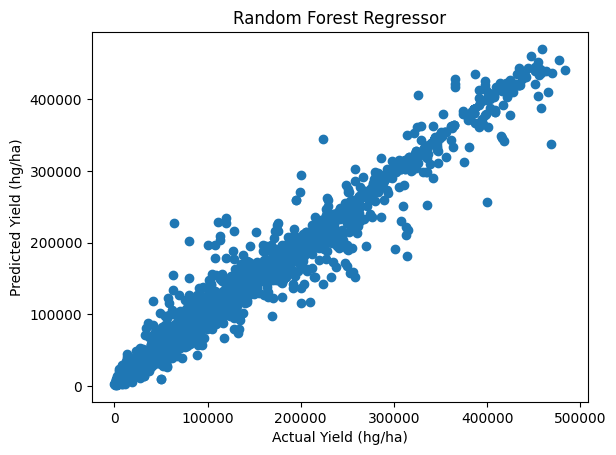

In [39]:
import matplotlib.pyplot as plt

# Predict the values for the test set
y_pred = rf.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Random Forest Regressor')
plt.show()


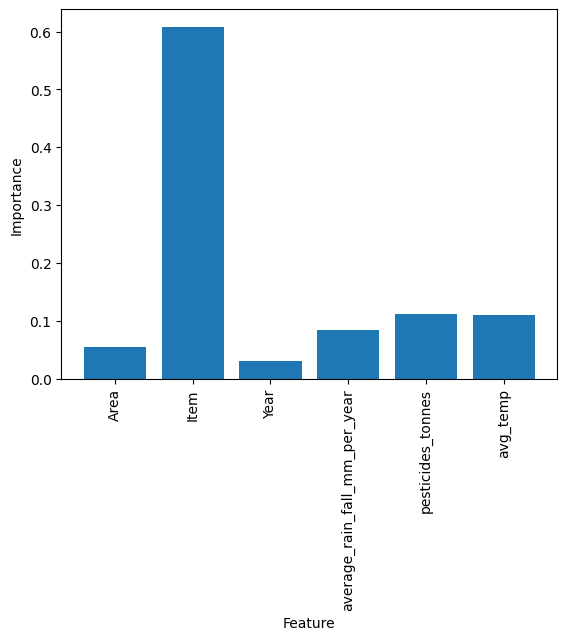

0.984723162200384

In [40]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = df_data_new.drop('hg/ha_yield', axis=1).columns.tolist()

# Create bar plot
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
_

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter space to search
param_space = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(5, 31, 5)),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Create the RandomizedSearchCV object with 10-fold cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_space, n_iter=1, cv=10,
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters found
print(rf_random.best_params_)

# Use the best estimator to make predictions on the test set
y_pred = rf_random.best_estimator_.predict(X_test)

# Compute and print the R^2 score
r3 = r2_score(y_test, y_pred)
print('R^2 score:', r3)

# Cells contain error

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


TypeError: ignored

In [ ]:
average_rain_fall_mm_per_year=input('enter Average Rainfall: ')
Year=input('enter Year: ')
pesticides_tonnes=input('enter  pesticides_tonnes:  ')
avg_temp=input('enter avg_temp:  ')
Area=input('enter Country:  ')
Item=input('enter Crop:  ')


out = rf.predict([[float(average_rain_fall_mm_per_year),
                     float(Year),
                     float(pesticides_tonnes),
                     float(avg_temp),
                     int(Area),
                     int(Item),
                    ]])

print('*****************************************')
print('CYP: ',out)

# Cells contain errors

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# # load the data
# data = pd.read_csv('crop_yield.csv')

# # split the data into features (X) and target variable (y)
# X = data.drop('hg/ha_yield', axis=1)
# y = data['hg/ha_yield']

# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest regressor model
rf = RandomForestRegressor(random_state=42)

# define the hyperparameters to tune
param_dist = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# create a randomized search object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# print the best parameters found
print(random_search.best_params_)

# use the best parameters to create the final model
rf_final = RandomForestRegressor(random_state=42, **random_search.best_params_)

# fit the final model to the data
rf_final.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_final.predict(X_test)

# evaluate the model using the R-squared score
print('R-squared score: ', r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R-squared score:  0.9826624537802872


In [44]:
y_pred = rf_final.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 90.55 %


In [45]:
average_rain_fall_mm_per_year=input('enter Average Rainfall: ')
Year=input('enter Year: ')
pesticides_tonnes=input('enter  pesticides_tonnes:  ')
avg_temp=input('enter avg_temp:  ')
Area=input('enter Country:  ')
Item=input('enter Crop:  ')


out = rf_final.predict([[float(average_rain_fall_mm_per_year),
                     float(Year),
                     float(pesticides_tonnes),
                     float(avg_temp),
                     int(Area),
                     int(Item),
                    ]])

print('*****************************************')
print('CYP: ',out)

enter Average Rainfall: 1485
enter Year: 1990
enter  pesticides_tonnes:  121
enter avg_temp:  16
enter Country:  0
enter Crop:  1
*****************************************
CYP:  [106198.73970635]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score


# Select the relevant columns
X = df_data_new[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df_data_new['hg/ha_yield']

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters to be tuned
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 9, 15]
min_samples_leaf = [1, 2, 4, 6]

# Create a random grid for hyperparameter tuning
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Create the model object
rf = RandomForestRegressor()

# Perform the random search with 10-fold cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the model with the best hyperparameters
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                            min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            max_features=best_params['max_features'],
                            max_depth=best_params['max_depth'])
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Compute and print the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

# Take inputs and print the prediction
average_rain_fall_mm_per_year = input('Enter average rainfall: ')
Year = input('Enter year: ')
pesticides_tonnes = input('Enter pesticides (tonnes): ')
avg_temp = input('Enter average temperature: ')
Area = input('Enter area: ')
Item = input('Enter item: ')

out = rf.predict([[int(Area), int(Item), int(Year), float(average_rain_fall_mm_per_year),
                    float(pesticides_tonnes), float(avg_temp)]])

print('Prediction:', out)

#Takes more then an hour to tune


In [47]:
df_data_new

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990.0,36613.0,1485.0,121.00,16.37
1,0,3,1990.0,66667.0,1485.0,121.00,16.37
2,0,4,1990.0,23333.0,1485.0,121.00,16.37
3,0,5,1990.0,12500.0,1485.0,121.00,16.37
4,0,6,1990.0,7000.0,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013.0,22581.0,657.0,2550.07,19.76
28238,100,5,2013.0,3066.0,657.0,2550.07,19.76
28239,100,6,2013.0,13142.0,657.0,2550.07,19.76
28240,100,7,2013.0,22222.0,657.0,2550.07,19.76


In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

# Split the data into features and target variable
X = df_data_new[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df_data_new['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=9, min_samples_leaf=1, max_features='auto')

# Initialize the AdaBoost regressor
ad = AdaBoostRegressor(base_estimator=rf, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
ad.fit(X_train, y_train)

# Predict on the testing data
y_pred = ad.predict(X_test)

# Compute and print the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

# Take inputs and print the prediction
average_rain_fall_mm_per_year = input('Enter Average Rainfall: ')
Year = input('Enter Year: ')
pesticides_tonnes = input('Enter Pesticides (in tonnes): ')
avg_temp = input('Enter Average Temperature: ')
Area = input('Enter Country: ')
Item = input('Enter Crop: ')

out = ad.predict([[int(Area), int(Item), int(Year), float(average_rain_fall_mm_per_year), float(pesticides_tonnes), float(avg_temp)]])

print('Predicted Yield (hg/ha): ', out)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been d

R^2 score: 0.987991989455638
Enter Average Rainfall: 1485
Enter Year: 1990
Enter Pesticides (in tonnes): 121
Enter Average Temperature: 16
Enter Country: 0
Enter Crop: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


Predicted Yield (hg/ha):  [30015.14734375]


In [49]:
!pip install bayesian-optimization


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from bayes_opt import BayesianOptimization

import numpy as np

# Load your dataset
X = df_data_new[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df_data_new['hg/ha_yield']

# Define the objective function for Bayesian optimization
def rf_objective(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    # Create a random forest regressor with the specified hyperparameters
    rf = RandomForestRegressor(n_estimators=int(n_estimators),
                               max_depth=int(max_depth),
                               min_samples_split=int(min_samples_split),
                               min_samples_leaf=int(min_samples_leaf),
                               max_features=max_features,
                               random_state=42)

    # Fit the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf.predict(X_test)

    # Compute the R^2 score
    r2 = r2_score(y_test, y_pred)

    # Return the negative R^2 score (to be minimized by Bayesian optimization)
    return -r2

# Define the hyperparameter search space for Bayesian optimization
# Define the range of hyperparameters to test
pbounds = {'n_estimators': (100, 1000),
           'max_features': [1, 2, 3, 4, None, 'sqrt', 'log2'],
           'max_depth': (5, 30),
           'min_samples_split': (2, 10),
           'min_samples_leaf': (1, 10)}


# Create the optimizer object
optimizer = BayesianOptimization(f=rf_objective, pbounds=pbounds, random_state=42)

# Perform the optimization
optimizer.maximize(n_iter=10, init_points=10)


# Print the best hyperparameters and the corresponding R^2 score
print(optimizer.max)

# Cell contains error

In [51]:
df_data_new['Area']=df_data_new['Area'].astype(float)
df_data_new['Item']=df_data_new['Item'].astype(float)

In [52]:
df_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  float64
 1   Item                           28242 non-null  float64
 2   Year                           28242 non-null  float64
 3   hg/ha_yield                    28242 non-null  float64
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from bayes_opt import BayesianOptimization
import numpy as np

# Define the objective function for random forest regression
def rf_objective(max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators):
    # Define the random forest regressor with the specified hyperparameters
    rf = RandomForestRegressor(max_depth=int(max_depth),
                                max_features=max_features,
                                min_samples_leaf=int(min_samples_leaf),
                                min_samples_split=int(min_samples_split),
                                n_estimators=int(n_estimators),
                                random_state=42)

    # Split the data into train and test sets
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Fit the random forest model on the training data
    rf.fit(X_train, y_train)

    # Predict on the test set and calculate the R^2 score
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return r2

# Define the hyperparameter space
pbounds = {'max_depth': (1, 10),
           'max_features': (0.1, 1.0),
           'min_samples_leaf': (1, 10),
           'min_samples_split': (2, 20),
           'n_estimators': (50, 500)}

# Create the optimizer object
optimizer = BayesianOptimization(f=rf_objective, pbounds=pbounds, random_state=42)

# Perform the optimization
optimizer.maximize(n_iter=10, init_points=10)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.6622    | 4.371     | 0.9556    | 7.588     | 12.78     | 120.2     |
| 2         | 0.1544    | 2.404     | 0.1523    | 8.796     | 12.82     | 368.6     |
| 3         | 0.2395    | 1.185     | 0.9729    | 8.492     | 5.822     | 131.8     |
| 4         | 0.2922    | 2.651     | 0.3738    | 5.723     | 9.775     | 181.1     |
| 5         | 0.4367    | 6.507     | 0.2255    | 3.629     | 8.595     | 255.2     |
| 6         | 0.5236    | 8.067     | 0.2797    | 5.628     | 12.66     | 70.9      |
| 7         | 0.4301    | 6.468     | 0.2535    | 1.585     | 19.08     | 484.5     |
| 8         | 0.7195    | 8.276     | 0.3742    | 1.879     | 14.32     | 248.1     |
| 9         | 0.3579    | 2.098     | 0.5457    | 1.309     | 18.37     | 166.5     |
| 10        | 0.6775    | 6.963     | 0.3805    | 5.68

In [54]:
print(optimizer.max)

{'target': 0.7496283767629786, 'params': {'max_depth': 7.460271631892603, 'max_features': 0.714089448384305, 'min_samples_leaf': 3.7407752651991943, 'min_samples_split': 16.678467784449445, 'n_estimators': 245.01238302658473}}


In [56]:
def rf_objective(max_depth, max_features, min_samples_split, min_samples_leaf, n_estimators):
    # Convert max_depth from float to int
    max_depth = int(max_depth)

    # Create the random forest regressor object
    rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
    pbounds = {'max_depth': (1, 30), 'max_features': (0.1, 1.0), 'min_samples_leaf': (1, 50)}


    # Fit the model on the entire dataset
    rf.fit(X, y)

    # Make predictions on the validation set
    y_pred = rf.predict(X_val)

    # Calculate and return the negative mean squared error
    mse = mean_squared_error(y_val, y_pred)
    return -mse


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Create a random forest regressor with the optimized hyperparameters
rf = RandomForestRegressor(n_estimators=..., max_depth=..., min_samples_split=..., min_samples_leaf=..., max_features=..., random_state=42)

# Create an AdaBoost regressor that uses the random forest regressor as the base estimator
ada = AdaBoostRegressor(base_estimator=rf, n_estimators=100, random_state=42)

# Fit the model on the entire dataset
ada.fit(X, y)

# Cell contains error